<a href="https://colab.research.google.com/github/rohitnikam1/Fastai-projects/blob/master/pet_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter, we are going to do a deep dive into the mechanics of deep learning. We will make the basic deep learning applications better and apply them to a wider variety of types of data.

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 7.3 MB/s 
     |████████████████████████████████| 1.2 MB 23.8 MB/s 
     |████████████████████████████████| 46 kB 5.7 MB/s 
     |████████████████████████████████| 188 kB 34.4 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 51 kB 293 kB/s 
Mounted at /content/gdrive


# Classifying breeds of dogs and cats

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [3]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [ ]:
(path/'images').ls()

(#7393) [Path('images/pomeranian_93.jpg'),Path('images/boxer_106.jpg'),Path('images/samoyed_138.jpg'),Path('images/leonberger_165.jpg'),Path('images/great_pyrenees_36.jpg'),Path('images/american_pit_bull_terrier_88.jpg'),Path('images/Sphynx_115.jpg'),Path('images/basset_hound_180.jpg'),Path('images/wheaten_terrier_109.jpg'),Path('images/japanese_chin_53.jpg')...]

In [ ]:
fname = (path/'images').ls()[0]
fname.name

'pomeranian_93.jpg'

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['pomeranian']

Creating Pets datablock

In [4]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/'images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


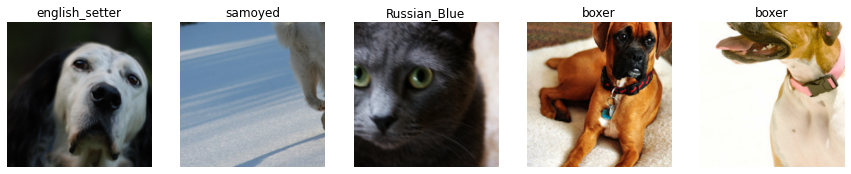

In [5]:
dls.show_batch(nrows=1, ncols=5)

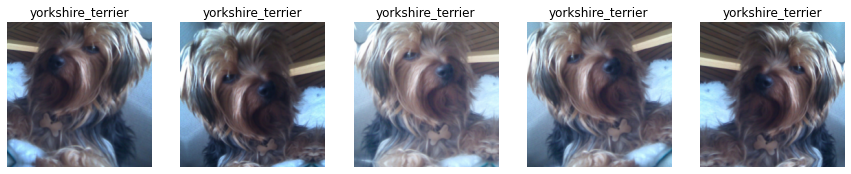

In [6]:
dls.show_batch(nrows=1, ncols=5, unique=True)

As soon as we have a datablock, passing it through a model can help us clean it.

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.470495,0.357573,0.115697,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.504886,0.333749,0.094723,01:13
1,0.326875,0.237706,0.065629,01:13


Here fastai automatically assigns the appropriate loss function to the learning.

In [8]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

## Cross entropy loss

Here we now look at the activations of our model. To actually get a batch of real data from our DataLoaders, we can use the method -- `one_batch`:

In [9]:
x,y = dls.one_batch()

It returns the dependent and independent variables as a mini-batch.

In [10]:
y

TensorCategory([31, 25, 28, 17, 21,  2, 24, 22, 22, 31, 35,  2, 30,  2, 33,  4, 10, 10, 32, 32,  0, 14, 23, 35, 30, 11, 13, 23, 20, 15, 29, 23, 30, 29,  3, 17, 24, 32, 17, 21,  6, 19, 21, 22,  0,  6, 10,  8,
        13, 31, 29,  6,  2, 16, 15, 27, 13, 10, 17, 22, 32,  7, 31, 32], device='cuda:0')

In [11]:
dls.vocab[0]

'Abyssinian'

Our batch size is 64, so we have 64 rows in this tensor. Each row is a single integer representing our 37 possible pet breeds.

We can view the predictions (or the activations of the final layer of our neural network) using `Learner.get_preds`. This function takes a dataset index (0 for training and 1 for validation) or an iterator of batches. Thus, we can pass it a simple list with our batch to get our predictions. It returns predictions and targets by default, but since we already have the targets, we can ignore then by assigning them to the special variable `_`:

In [12]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.3248e-09, 1.6914e-10, 1.1679e-07, 2.1812e-09, 2.7037e-07, 6.0694e-10, 6.3247e-09, 1.0178e-07, 2.1919e-07, 1.2361e-09, 1.4992e-08, 4.1015e-09, 4.3156e-09, 2.4210e-09, 4.5862e-09, 3.9954e-09,
        2.7000e-10, 1.9852e-09, 2.8361e-10, 1.0318e-09, 2.4395e-10, 2.0028e-06, 2.9997e-09, 7.3041e-09, 1.7507e-06, 1.3833e-08, 4.6172e-09, 9.6788e-09, 3.8769e-06, 4.8810e-10, 2.6581e-09, 9.9999e-01,
        7.3972e-08, 5.2993e-06, 1.2343e-09, 2.0204e-09, 1.3377e-09])

In [13]:
len(preds[0]), preds[0].sum()

(37, tensor(1.))

To transform the activations of our model into predictions like this, we used Softmax activation function.

## Log likelihood

For binary classification, we define the loss function by applying sigmoid activation function to predictions and pass the results through `torch.where` function (as used in 3 vs. 7 handwritten digit classification in mnist_basics notebook). 


For classifying multiple categories, we cannot use `torch.where` anymore. We instead use indexing. For example for binary case:

In [14]:
targ = tensor([0,1,0,1,1,0])

and assume that the following are the softmax activations:

In [17]:
torch.random.manual_seed(42);

In [18]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [19]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [20]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

This is identical to `torch.where`

In [21]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [22]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

When we first take the softmax, and then log likelihood of that, that combination is called the **cross entropy loss**. For example, in PyTorch, `nn.CrossEntropyLoss` is the same as taking `log_softmax` and then `nll_loss`.

In [23]:
loss_func = nn.CrossEntropyLoss()

In [24]:
loss_func(acts, targ)

tensor(1.8045)

PyTorch provides loss functions in two forms. In the class seen above, and also a plain functional form, available in the `F` subspace:

In [25]:
F.cross_entropy(acts, targ)

tensor(1.8045)

By default, PyTorch takes the mean of loss of all items. To avoid that, we can use:

In [26]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

# Model interpretation

Loss functions are used by computers to be differentiated and optimized, but are harder to interprete. Metrics are better alternatives for that purpose. Below is a confusion matrix showing the model performance:

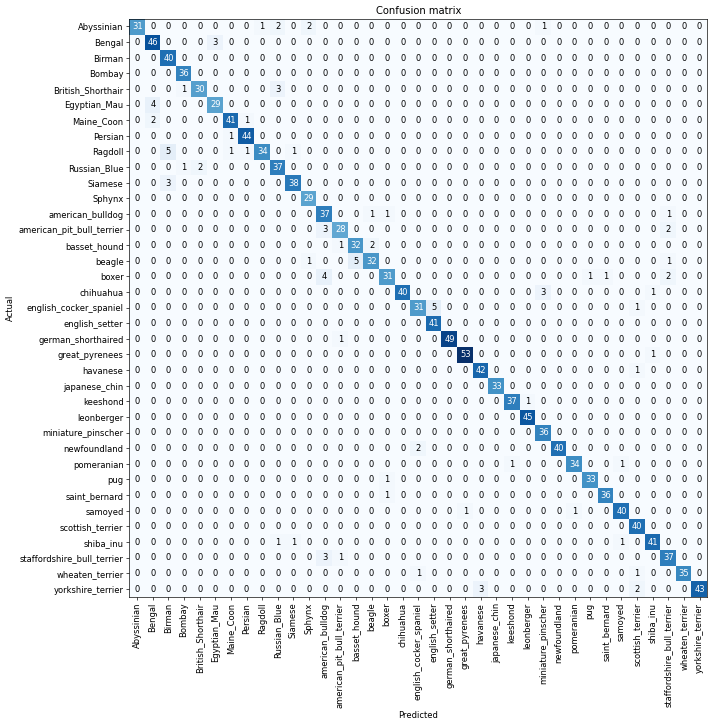

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [29]:
interp.most_confused(min_val=4)

[('Bengal', 'Egyptian_Mau', 9),
 ('Ragdoll', 'Birman', 7),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Siamese', 'Birman', 5),
 ('boxer', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('yorkshire_terrier', 'havanese', 4)]

Turns out that the pairs above that our model is confusing between, are confused even by expert breeders sometimes, which indicates that we have a good baseline. Let's try to make the model even better.

# Improving our model

One of the most important parameters to consider while improving the model is to the learning rate. It needs to be just right to train as efficiently as possible. In the following, we try a higher learning rate (0.1).

In [30]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.628868,3.902162,0.404601,01:13


epoch,train_loss,valid_loss,error_rate,time
0,3.373842,2.713457,0.549391,01:16


We see that the `error_rate` has increased. Fastai provides Learning Rate Finder for finding a good learning rate.

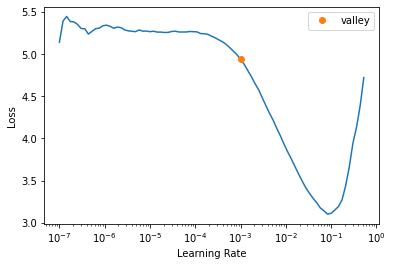

In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
valley = learn.lr_find()

In [17]:
valley

SuggestedLRs(valley=0.0010000000474974513)

In [18]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=0.0010000000474974513)

epoch,train_loss,valid_loss,error_rate,time
0,2.005341,0.374397,0.112314,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.570463,0.253631,0.079838,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.570463,0.253631,0.079838,01:15
1,0.405104,0.237964,0.076455,01:14


Now that we have a good learning rate to train our model, let's look at how we can fine-tune the weights of a pretrained model.

# Unfreezing and transfer learning

- Convolutional neural network consists of multiple linear layers with nonlinear activation functions sandwitched in between each pair. The network is then followed by one or more linear layers, and terminated by an activation function like softmax.

- The final layer uses a matrix with enough columns such that the output size is the same as the number of categories to be classified.

- During transfer learning, we replace the final linear layer from the pre-trained model with the new linear layer with the correct number of outputs for a desired classification task.

- We fine tune this new model in such a way that it remembers generally useful ideas from the pre-trained model, use these ideas to solve our particular task (classify pet breeds), and only adjust them according to the specifics of that task. 

- When we create a model from a pretrained network fastai automatically freezes all of the pretrained layers for us. When we call the `fine_tune` method fastai does two things:

 - Trains the randomly added layers for one epoch, with all other layers frozen

 - Unfreezes all of the layers, and trains them all for the number of epochs requested

- This is a reasonable approach. However, the `fine_tune` method is customizable and it is possible to achieve better model performance via experimenting with different parameters/steps the `fine_tune` method includes.

Let's try to fine tune the model manually. We first train the randomly added layers for three epochs, using `fit_one_cycle`. 

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.157601,0.310390,0.094046,01:10
1,0.523272,0.261744,0.079161,01:10
2,0.313916,0.222089,0.071042,01:11


Then we'll unfreeze the model:

In [21]:
learn.unfreeze()

Now we have to run `lr_find` again, since having more layers to train, and weights that have already been trained for 3 epochs, means our previously found learning rate is not appropriate anymore.

SuggestedLRs(valley=9.999999747378752e-06)

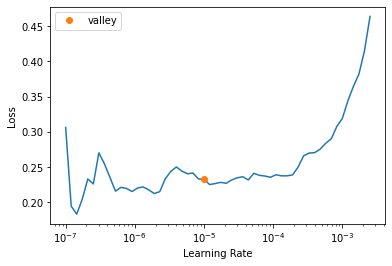

In [22]:
learn.lr_find()

- The above graph looks different than the one where we had random weights. We don't see sharp descent here, since the model has been trained already.

- Here we have small local fluctuations in loss before a sharp increase. We should take a point well before that sharp increase.

In [23]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.251715,0.214623,0.065629,01:15
1,0.262017,0.206526,0.059540,01:14
2,0.220440,0.200025,0.060893,01:15
3,0.202659,0.195556,0.060217,01:14
4,0.195952,0.196426,0.058187,01:14
5,0.182984,0.188935,0.054804,01:14


This has improved our model a bit, but there's more we can do. The deepest layers of our pretrained model might not need as high a learning rate as the last ones, so we should probably use different learning rates for those -- this is known as using **discriminative learning rates**.

## Discriminative learning rates

- The pre-trained model has been passed through hundreds of epochs and on millions of images. This means the the pre-trained model weights are very high in quality towards making correct classification.  

- In our newly fine-tuned model, the learning rate for these pre-trained weights would not be the same as the random weights added in the last layer, even after fine-tuning for few epochs.

- Therefore, it is perhaps wise to use different learning rates for different layers.

fastai lets you pass a Python slice object anywhere that a learning rate is expected. The first value passed will be the learning rate in the earliest layer of the neural network, and the second value will be the learning rate in the final layer. The layers in between will have learning rates that are multiplicatively equidistant throughout that range.

Let's use this approach to replicate the previous training:



In [24]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.136625,0.320721,0.103518,01:08
1,0.518820,0.278809,0.083221,01:09
2,0.334124,0.234721,0.077131,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.264258,0.227593,0.069012,01:13
1,0.245514,0.216565,0.066306,01:13
2,0.247743,0.213808,0.066982,01:14
3,0.209998,0.198323,0.064953,01:14
4,0.200229,0.195097,0.063599,01:14
5,0.169576,0.189094,0.057510,01:14
6,0.157447,0.192151,0.064276,01:14
7,0.155140,0.186569,0.057510,01:13
8,0.138915,0.185094,0.058187,01:13
9,0.138603,0.183242,0.056157,01:14


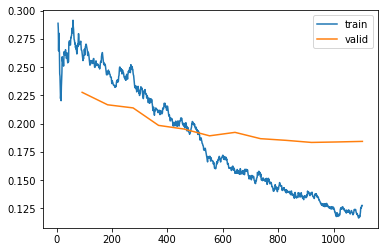

In [25]:
learn.recorder.plot_loss()

- As you can see, the training loss keeps getting better and better. But notice that eventually the validation loss improvement slows, and sometimes even gets worse! This is the point at which the model is starting to **overfit**.

-  **In the end what matters is your chosen metrics, not the loss.** The loss is just the function we've given the computer to help us to optimize.

## How many epochs should we run?

- First approach to training should be to simply pick a number of epochs that will train in the amount of time that we are happy to wait for. Then look at the training and validation loss plots, as shown above, and in particular our *metrics*, and if we see that they are still getting better even in your final epochs, then we know that we have not trained for too long.

- If we have overfit, we should retrain your model from scratch, and this time select a total number of epochs based on where our previous best results were found.

- If there is time to train for more epochs, we should use that time to train more parameters -- that is, use a deeper architecture.

## Deeper architecture

- In general, a model with more parameters can model your data more accurately.

- One can create larger models by simply adding more layers. However, since we want to use pretrained models, we need to make sure that we choose a number of layers that have already been pretrained for us.

- A larger (more layers and parameters; sometimes described as the "capacity" of a model) version of a ResNet will give a better training loss, but also overfitting, because it has more parameters to overfit with.

- The other disadvantage of deeper architectures is they take long time to train. One can then use **mixed-precision training**, refering to half-precision floating point (fp16) numbers.

In [27]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,5.441665,4.282211,0.974966,01:09
1,5.157671,3.871687,0.949256,01:07
2,4.558889,3.250803,0.868742,01:07


epoch,train_loss,valid_loss,error_rate,time
0,4.144808,3.141448,0.852503,01:09
1,3.930804,2.859817,0.779432,01:09
2,3.622589,2.579286,0.696211,01:09
3,3.400754,2.405120,0.629905,01:09
4,3.258379,2.334836,0.598106,01:09
5,3.201273,2.311776,0.591340,01:09


We've gone back to using `fine_tune`, since it's so handy! We can pass `freeze_epochs` to tell fastai how many epochs to train for while frozen. It will automatically change learning rates appropriately for most datasets.